In [1]:
from rmps_purity import *
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

np.set_printoptions(precision=3, threshold=np.inf, suppress=True)

# Test

## Open boundary conditions 

In [2]:
num_sites = 30
chi = 30
ormps1 = open_rmps(num_sites, chi)
ormps2 = open_rmps(num_sites, chi) 

In [3]:
ormps1.get_skeleton(), ormps1.norm(), ormps2.norm()

([(1, 2, 2),
  (2, 4, 2),
  (4, 8, 2),
  (8, 16, 2),
  (16, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 16, 2),
  (16, 8, 2),
  (8, 4, 2),
  (4, 2, 2),
  (2, 1, 2)],
 (1.000000000000001-8.326672684688674e-17j),
 (1.0000000000000009-8.326672684688674e-17j))

In [4]:
ormps1.overlap(ormps2)

(2.4936302033928687e-05+1.6458312375780154e-05j)

## Periodic boundary conditions 

In [5]:
n = 30
chi = 30
prmps1 = periodic_rmps(n, chi)
prmps2 = periodic_rmps(n, chi)

In [6]:
prmps1.get_skeleton(), prmps1.norm(), prmps2.norm()

([(30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2),
  (30, 30, 2)],
 (0.9999999999999996-1.134346522962959e-17j),
 (1.0000000000000009-1.0001765041178778e-17j))

In [7]:
prmps1.overlap(prmps2)

(-6.7481871480038205e-06-7.761984243070918e-06j)

## Purities 

In [5]:
n_list = np.arange(2,6)
chi = 3
k_copies = 2

In [6]:
purity_against_n = []
for n in n_list:
    samples = trace_samples(n, chi, num_samples=1000, scaled=False)
    purity = samples_to_purity(samples, k_copies)
    purity_against_n.append(purity)

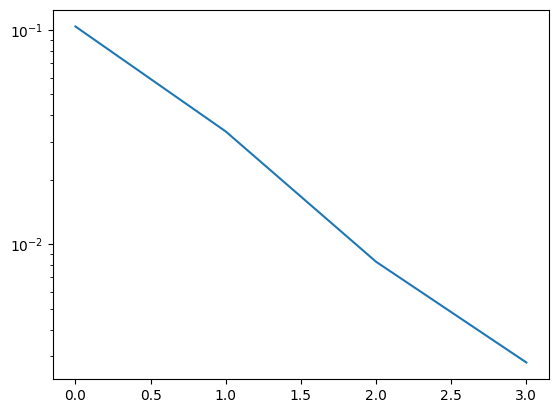

In [7]:
plt.plot(purity_against_n)
plt.yscale('log')

In [8]:
n_list = np.arange(2,11)
chi = 4
k_copies = 2

In [9]:
scaled_purity_against_n = []
for n in n_list:
    samples = trace_samples(n, chi, num_samples=1000, scaled=True)
    purity = samples_to_purity(samples, k_copies)
    scaled_purity_against_n.append(purity)

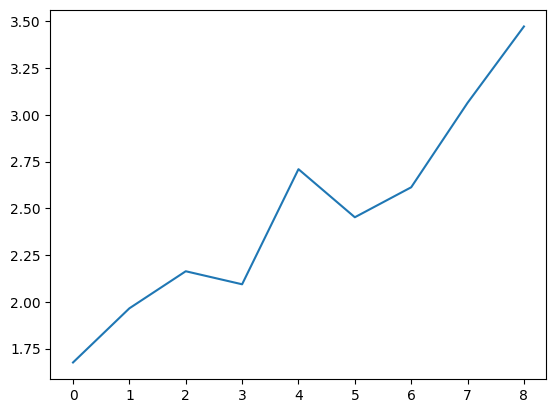

In [10]:
plt.plot(scaled_purity_against_n)

# Data

In [2]:
import pickle
with open("constant.pickle", "rb") as f: 
    c_data = pickle.load(f)
    
with open("linear.pickle", "rb") as f: 
    l_data = pickle.load(f)

In [2]:
def process_data(c_data, k_copies, max_n=50, n_incr=2, batch_size=1000): 
    num_samples = c_data.shape[1]
    num_batches = int(num_samples//batch_size)
    
    n_list = np.arange(2, int(max_n)+1, int(n_incr))
    h_purity = [haar_purity(n, k_copies) for n in n_list]

    err_mean = []
    err_std = []
    for i in range(25):
        batches = [c_data[i,j*batch_size:(j+1)*batch_size] for j in range(num_batches)]
        purities = [samples_to_purity(batch, k_copies) for batch in batches]
        one_err = [np.sqrt(2**(n_list[i]*k_copies) * (p-h_purity[i])) for p in purities]
        err_mean.append(np.mean(one_err))
        err_std.append(np.std(one_err))
    
    return err_mean, err_std, n_list

## chi = 4 

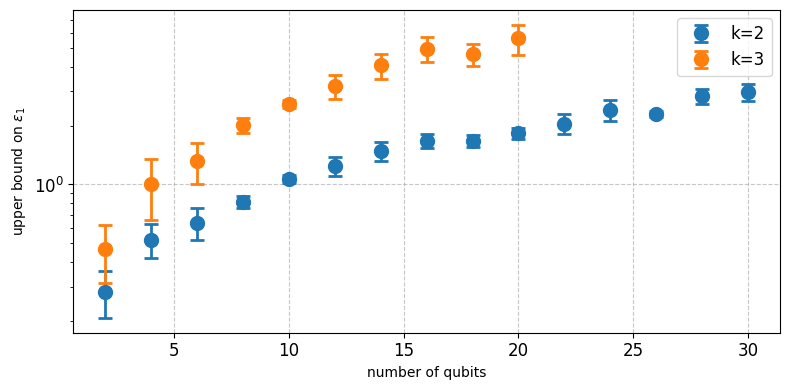

In [32]:
plt.figure(figsize=(8, 4))

k = 2
err_mean, err_std, n_list = process_data(c_data, k)
upto = 15
plt.errorbar(n_list[:upto], err_mean[:upto], yerr=err_std[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=f'k={k}')

k = 3
err_mean, err_std, n_list = process_data(c_data, k)
upto = 10
plt.errorbar(n_list[:upto], err_mean[:upto], yerr=err_std[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=f'k={k}')

plt.ylabel(f'upper bound on $\epsilon_1$')
plt.xlabel('number of qubits')
plt.yscale('log')
#plt.title('MPS of chi = 4 chosen from isometric distribution; 5000 samples')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("isometric_constant.png")

In [26]:
int("meow")

ValueError: invalid literal for int() with base 10: 'meow'

## chi = n 

/var/folders/ht/k8lxqdrd785cq9p2gf7tckhc0018l9/T/ipykernel_11766/2540664683.py:13: RuntimeWarning: invalid value encountered in sqrt
  one_err = [np.sqrt(2**(n_list[i]*k_copies) * (p-h_purity[i])) for p in purities]


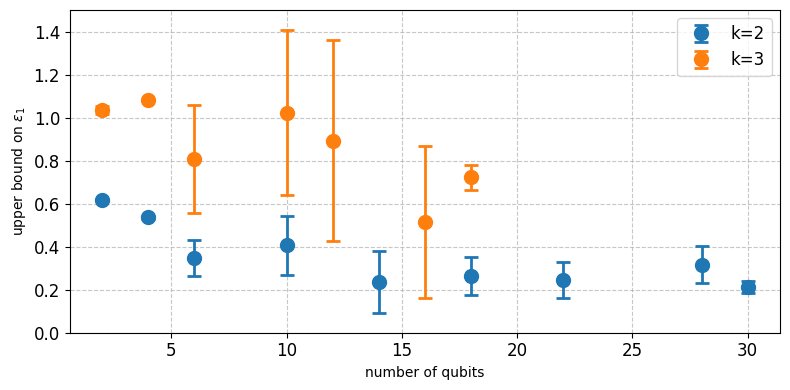

In [6]:
plt.figure(figsize=(8, 4))

k = 2
err_mean, err_std, n_list = process_data(l_data, k, batch_size=2000)
upto = 15
plt.errorbar(n_list[:upto], err_mean[:upto], yerr=err_std[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=f'k={k}')

k = 3
err_mean, err_std, n_list = process_data(l_data, k, batch_size=2000)
upto = 10
plt.errorbar(n_list[:upto], err_mean[:upto], yerr=err_std[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=f'k={k}')

plt.ylabel(f'upper bound on $\epsilon_1$')
plt.xlabel('number of qubits')
#plt.title('MPS of chi = n chosen from isometric distribution; 5000 samples')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)
plt.ylim(0,1.5)
plt.tight_layout()
plt.savefig("isometric_linear.png")

# New data

In [18]:
import pickle
with open("linear.pickle", "rb") as f: 
    l_data = pickle.load(f)
    
with open("superlinear.pickle", "rb") as f: 
    sl_data = pickle.load(f)

with open("quadratic.pickle", "rb") as f: 
    q_data = pickle.load(f)

In [7]:
def new_process_data(data, k_copies, max_n=50, n_incr=2, batch_size=1000): 
    num_samples = data.shape[1]
    num_batches = int(num_samples//batch_size)
    
    n_list = np.arange(6, int(max_n)+1, int(n_incr))
    h_purity = [haar_purity(n, k_copies, scaled=True) for n in n_list]

    err_mean = []
    err_std = []
    for i in range(23):
        batches = [data[i,j*batch_size:(j+1)*batch_size] for j in range(num_batches)]
        purities = [samples_to_purity(batch, k_copies) for batch in batches]
        one_err = [np.sqrt(2**k_copies * (p-h_purity[i])) for p in purities]
        err_mean.append(np.mean(one_err))
        err_std.append(np.std(one_err))
    
    return err_mean, err_std, n_list

In [23]:
k = 2
err_mean, err_std, n_list = process_data(sl_data, k, batch_size=10000)
err_mean

/var/folders/ht/k8lxqdrd785cq9p2gf7tckhc0018l9/T/ipykernel_9831/2499120171.py:13: RuntimeWarning: invalid value encountered in sqrt
  one_err = [np.sqrt(2**k_copies * (p-h_purity[i])) for p in purities]


[0.26148257788371826,
 0.07941876355508655,
 0.5112625964907481,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

/var/folders/ht/k8lxqdrd785cq9p2gf7tckhc0018l9/T/ipykernel_9831/2499120171.py:13: RuntimeWarning: invalid value encountered in sqrt
  one_err = [np.sqrt(2**k_copies * (p-h_purity[i])) for p in purities]


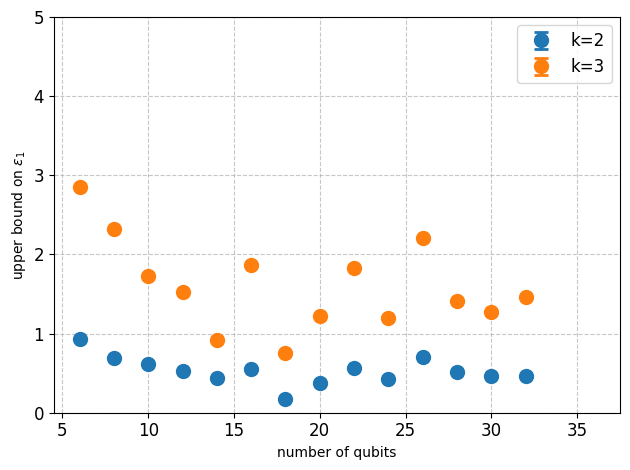

In [30]:
k = 2
err_mean, err_std, n_list = process_data(l_data, k, batch_size=10000)
upto = 16
plt.errorbar(n_list[:upto], err_mean[:upto], yerr=err_std[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=f'k={k}')

k = 3
err_mean, err_std, n_list = process_data(l_data, k, batch_size=10000)
upto = 16
plt.errorbar(n_list[:upto], err_mean[:upto], yerr=err_std[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=f'k={k}')

plt.ylabel(f'upper bound on $\epsilon_1$')
plt.xlabel('number of qubits')
#plt.title('MPS of chi = n chosen from isometric distribution; 5000 samples')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)
plt.ylim(0,5)
plt.tight_layout()
plt.savefig("isometric_linear.png")

# Data collapse

In [3]:
import pickle
with open("constant.pickle", "rb") as f: 
    data_chi4 = pickle.load(f)
    
with open("8.pickle", "rb") as f: 
    data_chi8 = pickle.load(f)
    
with open("16.pickle", "rb") as f: 
    data_chi16 = pickle.load(f)    

In [4]:
def new_process_data(data, k_copies, max_n=50, n_incr=2, batch_size=1000): 
    num_samples = data.shape[1]
    num_batches = int(num_samples//batch_size)
    
    n_list = np.arange(6, int(max_n)+1, int(n_incr))
    h_purity = [haar_purity(n, k_copies, scaled=True) for n in n_list]

    err_mean = []
    err_std = []
    for i in range(len(data)):
        batches = [data[i,j*batch_size:(j+1)*batch_size] for j in range(num_batches)]
        purities = [samples_to_purity(batch, k_copies) for batch in batches]
        one_err = [np.sqrt(2**k_copies * (p-h_purity[i])) for p in purities]
        err_mean.append(np.mean(one_err))
        err_std.append(np.std(one_err))
        
    return err_mean, err_std, n_list

/var/folders/ht/k8lxqdrd785cq9p2gf7tckhc0018l9/T/ipykernel_30360/607747518.py:13: RuntimeWarning: invalid value encountered in sqrt
  one_err = [np.sqrt(2**k_copies * (p-h_purity[i])) for p in purities]


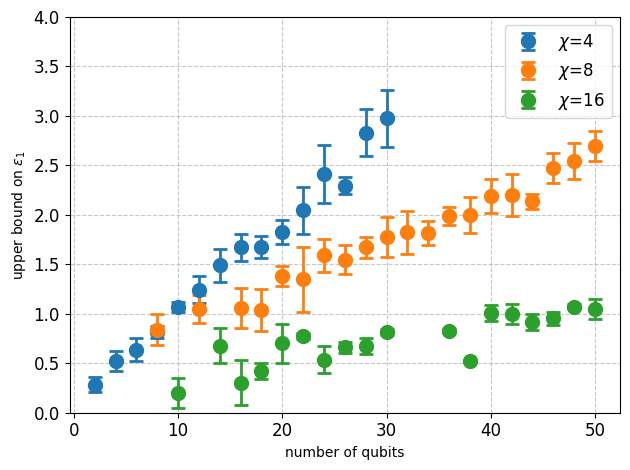

In [5]:
k = 2


err_mean4, err_std4, n_list = process_data(data_chi4, k)
upto = 15
plt.errorbar(n_list[:upto], err_mean4[:upto], yerr=err_std4[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=r'$\chi$=4')

err_mean8, err_std8, n_list = new_process_data(data_chi8, k, batch_size=2000)
upto = 30
plt.errorbar(n_list[:upto], err_mean8[:upto], yerr=err_std8[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=r'$\chi$=8')


err_mean16, err_std16, n_list = new_process_data(data_chi16, k, batch_size=5000)
upto = 30
plt.errorbar(n_list[:upto], err_mean16[:upto], yerr=err_std16[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=r'$\chi$=16')

plt.ylabel(f'upper bound on $\epsilon_1$')
plt.xlabel('number of qubits')
#plt.title('MPS of chi = n chosen from isometric distribution; 5000 samples')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)
plt.ylim(0,4)
plt.tight_layout()
#plt.savefig("isometric_linear.png")

In [58]:
import pickle 
with open("shivan.pickle", "wb") as f:
    pickle.dump((err_mean4, err_mean8, err_mean16), f)

/var/folders/ht/k8lxqdrd785cq9p2gf7tckhc0018l9/T/ipykernel_30360/607747518.py:13: RuntimeWarning: invalid value encountered in sqrt
  one_err = [np.sqrt(2**k_copies * (p-h_purity[i])) for p in purities]


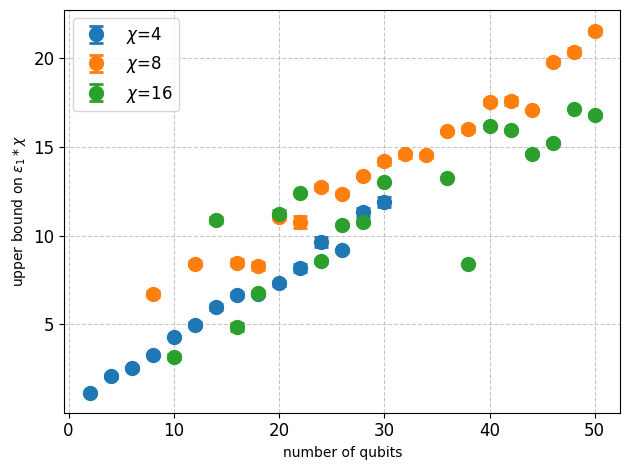

In [6]:
k = 2

err_mean4, err_std4, n_list = process_data(data_chi4, k)
upto = 15
plt.errorbar(n_list[:upto], np.array(err_mean4[:upto])*4, yerr=err_std4[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=r'$\chi$=4')

err_mean8, err_std8, n_list = new_process_data(data_chi8, k, batch_size=2000)
upto = 30
plt.errorbar(n_list[:upto], np.array(err_mean8[:upto])*8, yerr=err_std8[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=r'$\chi$=8')


err_mean16, err_std16, n_list = new_process_data(data_chi16, k, batch_size=5000)
upto = 30
plt.errorbar(n_list[:upto], np.array(err_mean16)[:upto]*16, yerr=err_std16[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=r'$\chi$=16')

plt.ylabel(f'upper bound on $\epsilon_1 * \chi$')
plt.xlabel('number of qubits')
#plt.title('MPS of chi = n chosen from isometric distribution; 5000 samples')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)
#plt.ylim(0,4)
plt.tight_layout()
#plt.savefig("isometric_linear.png")
#plt.plot(n_list, 0.45*n_list)

/var/folders/ht/k8lxqdrd785cq9p2gf7tckhc0018l9/T/ipykernel_24561/607747518.py:13: RuntimeWarning: invalid value encountered in sqrt
  one_err = [np.sqrt(2**k_copies * (p-h_purity[i])) for p in purities]


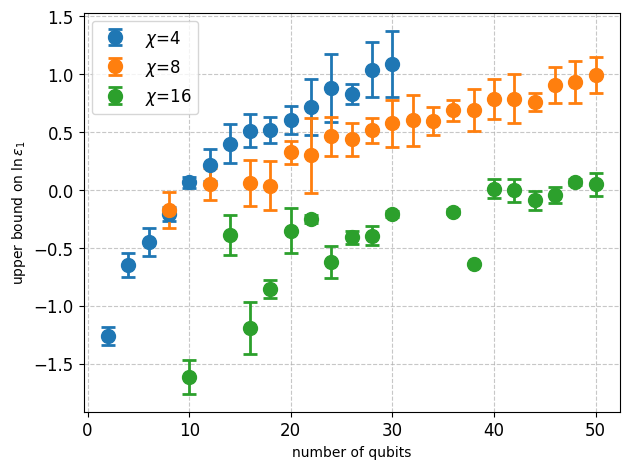

In [46]:
k = 2

err_mean4, err_std4, n_list = process_data(data_chi4, k)
upto = 15
plt.errorbar(n_list[:upto], np.log(np.array(err_mean4[:upto])), yerr=err_std4[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=r'$\chi$=4')

err_mean8, err_std8, n_list = new_process_data(data_chi8, k, batch_size=2000)
upto = 30
plt.errorbar(n_list[:upto], np.log(np.array(err_mean8[:upto])), yerr=err_std8[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=r'$\chi$=8')


err_mean16, err_std16, n_list = new_process_data(data_chi16, k, batch_size=5000)
upto = 30
plt.errorbar(n_list[:upto], np.log(np.array(err_mean16)[:upto]), yerr=err_std16[:upto], fmt='o', capsize=5, capthick=2, 
             markersize=10, linewidth=2, elinewidth=2, label=r'$\chi$=16')

plt.ylabel(f'upper bound on $\ln \epsilon_1$')
plt.xlabel('number of qubits')
#plt.title('MPS of chi = n chosen from isometric distribution; 5000 samples')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)
#plt.ylim(0,4)
plt.tight_layout()
#plt.savefig("isometric_linear.png")